# NLP
[Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing) это технология машинного обучения, которая наделяет компьютеры способностью интерпретировать, обрабатывать и понимать человеческий язык.

## 1. Machine Translation
`Машинный перевод` — это процесс автоматического перевода текста с одного естественного языка на другой с помощью компьютерного приложения.

Это означает, что вы добавляете текст в программу машинного перевода на исходном языке и позволяете инструменту автоматически перевести текст на выбранный целевой язык.

## 2. Information Retrival (IR)
`Извлечение информации` — это программная платформа, предназначенная для эффективного и результативного извлечения релевантной информации из набора данных или документов в ответ на запросы пользователя.

Наиболее распространенный пример информационного поиска — любая поисковая система: Google, Яндекс, Bing и т. д.

## 3. Setiment Analysis
Анализ настроений, также называемый анализом мнений, — это подход к обработке естественного языка (NLP), который определяет эмоциональный тон текста.

Системы анализа настроений помогают организациям получать информацию о настроениях клиентов в режиме реального времени, их опыте взаимодействия с клиентами и репутации бренда. Помимо определения настроений, анализ настроений может выявлять полярность (соотношение позитивных и негативных эмоций), а также определять тему и автора мнения в тексте.

## 4. Information Extraction
`IИзвлечение информации` — это подраздел обработки естественного языка, занимающийся автоматическим выявлением и извлечением структурированной информации из неструктурированных или полуструктурированных текстовых данных.

![Information Extraction example](https://nanonets.com/blog/content/images/2021/07/1--1-.gif)

## 5. Question Answering
`Модели «ответов на вопросы»` могут извлекать ответ на вопрос из заданного текста, что полезно для поиска ответа в документе. Некоторые модели ответов на вопросы могут генерировать ответы без контекста!

Теперь мы знаем о различных областях и реализациях НЛП.

Теперь мы начнем с основных шагов или конвейера для выполнения задачи НЛП.

![NLP pipeline](https://images.prismic.io/turing/65980b21531ac2845a272614_Natural_language_processing_pipeline_e3608ff95c.webp?auto=format,compress)

Мы разберем каждый шаг на примерах, не углубляясь в теоретическую часть.

## Что мы покроем?

Мы разберем вышеупомянутые шаги, базовые векторные представления слов и выполним одну классификацию текста.

| **Темы** | **Содержание** |
| ----- | ----- |
| **0. Импорт библиотек** | Мы собираемся установить [nltk](https://www.nltk.org/), [spacy](https://spacy.io/) и [torchtext](https://pytorch.org/text/stable/index.html) |
| **1. Анализ текста** | Мы рассмотрим, как выполнять синтаксический анализ текста с помощью spacy и nltk. |
| **2. Различные типы эмбеддингов** | Мы изучим и проанализируем различные векторные представления слов. |
| **3. Получим датасет** | Возьмём датасет [AG News](https://pytorch.org/text/stable/datasets.html#ag-news) из torchtext |
| **4. Создадим конвейер данных** | Мы настроим наши DataLoaders. |
| **5. Классификация текста** | Мы создадим первую модель классификации текста и проверим её производительность. |

### 0. Импорт библиотек
Начнём с импорта/загрузки необходимых модулей для этого раздела.

Ссылку для установки всех трех библиотек вы найдете в таблице.

`nltk` и `spacy` помогает выполнить некоторые этапы предварительной обработки данных без написания длинного и громоздкого кода.

In [1]:
!pip install nltk
!pip install spacy

Отлично! Теперь мы установили необходимые библиотеки для использования в этом лабораторном занятии.

В дальнейшем мы рассмотрим и используем установленные библиотеки. Для предварительной обработки данных в будущем вы можете использовать любую библиотеку nltk/spacy.

Spacy предоставляет наиболее эффективный алгоритм обработки естественного языка для заданной задачи. Поэтому, если для вас важен конечный результат, выбирайте Spacy.

Если же вы больше ориентированы на исследования, то можете использовать nltk, это самая популярная библиотека обработки естественного языка среди исследователей.

### 1. Анализ текста (text parsing)

In [3]:
import nltk
import spacy

In [ ]:
corpus = """
Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics. It is primarily concerned
with giving computers the ability to support and manipulate human language. It involves processing natural language datasets, such as
 text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based)
 machine learning approaches. The goal is a computer capable of "understanding" the contents of documents, including the contextual
 nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as
 well as categorize and organize the documents themselves.
"""

corpus — это набор аутентичных текстовых или аудиоданных, организованных в наборы данных. Таким образом, корпус — это не что иное, как необработанный текст или аудио.

Давайте сначала посмотрим, как легко извлечь предложения из входного корпуса с помощью nltk.

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize

sents = sent_tokenize(corpus)
i = 1
for sentance in sents:
    print(f"{i}. {sentance}")
    i+=1

1. 
Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics.
2. It is primarily concerned
with giving computers the ability to support and manipulate human language.
3. It involves processing natural language datasets, such as
 text corpora or speech corpora, using either rule-based or probabilistic (i.e.
4. statistical and, most recently, neural network-based)
 machine learning approaches.
5. The goal is a computer capable of "understanding" the contents of documents, including the contextual
 nuances of the language within them.
6. The technology can then accurately extract information and insights contained in the documents as
 well as categorize and organize the documents themselves.


Теперь давайте посмотрим, как мы можем сделать то же самое, используя Spacy.

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(corpus)

In [ ]:
# Если в приведенной выше команде возникает ошибка, раскомментируйте ее и запустите команду
# !spacy download en_core_web_sm

In [ ]:
i = 1
for sentance in doc.sents:
    print(i,sentance)
    i+=1

1 
Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics.
2 It is primarily concerned
with giving computers the ability to support and manipulate human language.
3 It involves processing natural language datasets, such as
 text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based)
 machine learning approaches.
4 The goal is a computer capable of "understanding" the contents of documents, including the contextual
 nuances of the language within them.
5 The technology can then accurately extract information and insights contained in the documents as
 well as categorize and organize the documents themselves.



Оказывается, это так легко и быстро разбить корпус на небольшие предложения, используя библиотеки spacy и nltk!!!

#### 1.1 Токенизация (Tokenization)

Токенизация — это процесс разделения текста на осмысленные сегменты.

In [ ]:
for token in doc:
    print(token)



Natural
language
processing
(
NLP
)
is
an
interdisciplinary
subfield
of
computer
science
and
linguistics
.
It
is
primarily
concerned


with
giving
computers
the
ability
to
support
and
manipulate
human
language
.
It
involves
processing
natural
language
datasets
,
such
as

 
text
corpora
or
speech
corpora
,
using
either
rule
-
based
or
probabilistic
(
i.e.
statistical
and
,
most
recently
,
neural
network
-
based
)

 
machine
learning
approaches
.
The
goal
is
a
computer
capable
of
"
understanding
"
the
contents
of
documents
,
including
the
contextual

 
nuances
of
the
language
within
them
.
The
technology
can
then
accurately
extract
information
and
insights
contained
in
the
documents
as

 
well
as
categorize
and
organize
the
documents
themselves
.




Отлично, с помощью Spacy было довольно легко разбить предложения на отдельные слова.

#### 1.2 Стемминг (Stemming)

Стемминг — это процесс сведения слова к его основе, к которой присоединяются суффиксы и префиксы.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
tokens = word_tokenize(corpus)
stemmer = PorterStemmer()

В Spacy нет опции стемминга, но nltk её поддерживает.

Существуют различные методы стемминга, я рекомендую вам их изучить, если будете заниматься NLP.

In [ ]:
for token in tokens:
    print(f"{token} | stem: {stemmer.stem(token)}")

Natural | stem: natur
language | stem: languag
processing | stem: process
( | stem: (
NLP | stem: nlp
) | stem: )
is | stem: is
an | stem: an
interdisciplinary | stem: interdisciplinari
subfield | stem: subfield
of | stem: of
computer | stem: comput
science | stem: scienc
and | stem: and
linguistics | stem: linguist
. | stem: .
It | stem: it
is | stem: is
primarily | stem: primarili
concerned | stem: concern
with | stem: with
giving | stem: give
computers | stem: comput
the | stem: the
ability | stem: abil
to | stem: to
support | stem: support
and | stem: and
manipulate | stem: manipul
human | stem: human
language | stem: languag
. | stem: .
It | stem: it
involves | stem: involv
processing | stem: process
natural | stem: natur
language | stem: languag
datasets | stem: dataset
, | stem: ,
such | stem: such
as | stem: as
text | stem: text
corpora | stem: corpora
or | stem: or
speech | stem: speech
corpora | stem: corpora
, | stem: ,
using | stem: use
either | stem: either
rule-based | st

#### 1.3 Лемматизация (Lemmatization)

Лемматизация — это процесс объединения различных словоизмененных форм одного и того же слова.

In [ ]:
for token in doc:
    print(f"{token} | lemma :  {token.lemma_}")


 | lemma :  

Natural | lemma :  natural
language | lemma :  language
processing | lemma :  processing
( | lemma :  (
NLP | lemma :  NLP
) | lemma :  )
is | lemma :  be
an | lemma :  an
interdisciplinary | lemma :  interdisciplinary
subfield | lemma :  subfield
of | lemma :  of
computer | lemma :  computer
science | lemma :  science
and | lemma :  and
linguistics | lemma :  linguistic
. | lemma :  .
It | lemma :  it
is | lemma :  be
primarily | lemma :  primarily
concerned | lemma :  concern

 | lemma :  

with | lemma :  with
giving | lemma :  give
computers | lemma :  computer
the | lemma :  the
ability | lemma :  ability
to | lemma :  to
support | lemma :  support
and | lemma :  and
manipulate | lemma :  manipulate
human | lemma :  human
language | lemma :  language
. | lemma :  .
It | lemma :  it
involves | lemma :  involve
processing | lemma :  process
natural | lemma :  natural
language | lemma :  language
datasets | lemma :  dataset
, | lemma :  ,
such | lemma :  such
as | lemm

Мне кажется, это выглядит отлично, нам следует использовать лемматизацию вместо стемминга, поскольку она хорошо подходит для анализа частей речи.

| **Stemming** | **Lematization** |
|-------|------|
| Используйте фиксированные правила, такие как removeable, ing и т. д., для образования базового слова. | Используйте знание языка (также известное как лингвистическое знание) для выведения базового слова (леммы). |
| Natural -> stem: natur | Natural -> lemma :  natural |

### 2. Различные типы эмбеддингов слов

В NLP векторные представления слов — это метод, при котором отдельные слова представляются в виде вещественных векторов в пространстве меньшей размерности и отражают межсловную семантику. Каждое слово представляется вещественным вектором с десятками или сотнями измерений.

#### 2.1 [Мешок N-грамм]

Модель «мешок n-грамм» — это способ представления документа, аналогичный модели [bag-of-words][/terms/bag-of-words/].

Модель «мешка n-грамм» представляет текстовый документ как неупорядоченную коллекцию его n-грамм.

Например, возьмем следующую фразу и разделим ее на биграммы (n=2).

> James is the best person ever.

становится

* <start>James
* James is
* is the
* the best
* best person
* person ever.
* ever.<end>

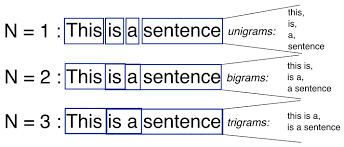

Недостатки:
1. С увеличением n увеличивается и разреженность размерности.
2. Метод «мешка n-грамм» имеет проблему отсутствия словарного запаса (OOV), как и более ранние методы, такие как one-hot и «мешок слов» (BoW).



#### 2.2 [Word2Vec](https://en.wikipedia.org/wiki/Word2vec)

Алгоритм преобразования слов в векторы обучается с помощью нейронной сети, которая изучает взаимосвязи между словами в больших базах данных текстов. Для представления конкретного слова в виде вектора в многомерном пространстве алгоритм использует один из двух режимов: CBOW или skip-gram.

![word2vec](https://serokell.io/files/kq/kqm6hyj1.pic6_Word2Vec.png)

Модель `Continuous bag-of-words(CBOW)` предсказывает центральное слово, используя окружающие контекстные слова, которые включают несколько слов до и после текущего слова.

Архитектура модели `skip-gram` предназначена для достижения противоположного результата по сравнению с моделью CBOW. Вместо того чтобы предсказывать центральное слово на основе окружающих контекстных слов, она стремится предсказывать окружающие контекстные слова, имея центральное слово.

### 3. Возьмёс датасет

[AG News](https://paperswithcode.com/dataset/ag-news) (AG’s News Corpus) представляет собой подмножество данных корпуса новостных статей AG, созданное путем объединения заголовков и описаний статей из 4 крупнейших классов (“World”, “Sports”, “Business”, “Sci/Tech”) из корпуса AG. AG News содержит 30 000 учебных и 1900 тестовых примеров для каждого курса.

In [ ]:
import torch

In [ ]:
torch.__version__

'2.9.0+cpu'

Перед запуском руководства необходимо установить последнюю версию 2.x пакета portalocker. Например, в среде Colab это можно сделать, добавив следующую строку в начало скрипта:

In [ ]:
!pip install -U portalocker>=2.0.0

Загрузите набор данных torch после выполнения команды pip.

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

# Загрузка датасета
dataset = load_dataset("ag_news")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]


Исследуем наш датасет

In [ ]:
train_iter = iter((ex['label'], ex['text']) for ex in dataset['train'])

label, text = next(train_iter)
print(f"Метка: {label}, Текст: {text[:50]}...")

Метка: 2, Текст: Wall St. Bears Claw Back Into the Black (Reuters) ...


In [ ]:
next(train_iter)

In [ ]:
from collections import Counter, OrderedDict
import re

# Простейший токенизатор на регулярных выражениях
def basic_english_tokenizer(text):
    text = text.lower()
    return re.findall(r'\w+', text)

# Собираем частотный словарь всех слов
counter = Counter()
for text in dataset['train']['text']:
    counter.update(basic_english_tokenizer(text))

# Создаем маппинг Слово -> ID
# Добавляем спецтокены: <pad> для отступов, <unk> для редких слов
specials = ['<pad>', '<unk>']
vocab = {word: i + len(specials) for i, (word, freq) in enumerate(counter.items()) if freq > 1}

# Добавляем спецтокены в начало
for i, token in enumerate(specials):
    vocab[token] = i

# Функция для конвертации текста в список чисел
def text_pipeline(text):
    return [vocab.get(token, vocab['<unk>']) for token in basic_english_tokenizer(text)]

# Проверка результата
example_text = "Hello, this is a business news!"
print(f"Размер словаря: {len(vocab)}")
print(f"Пример ID: {text_pipeline(example_text)}")

Словарь (размер): 44120
Пример ID: [24251, 739, 186, 35, 758, 473]


### 4. Создадим конвейер данных

Мы пересмотрели базовые компоненты для работы с текстом: словарь (vocab), векторы слов и токенизатор. Это фундаментальные элементы обработки сырых строк.

Для построения конвейера (pipeline) мы используем:
* Токенизатор: разбивает строку на отдельные слова (токены).
* Словарь (Vocabulary): сопоставляет каждому токену уникальный числовой индекс.
* Pipelines: функции, которые превращают сырой текст и метки классов в тензоры, готовые для подачи в нейросеть.



### 5. Classification Model

Модель состоит из слоя [nn.EmbeddingBag] и линейного слоя для классификации. `nn.EmbeddingBag` с режимом по умолчанию «mean» вычисляет среднее значение «мешка» эмбеддингов. Хотя текстовые записи здесь имеют разную длину, модуль `nn.EmbeddingBag` не требует заполнения, поскольку длина текста сохраняется в смещениях.

Кроме того, поскольку `nn.EmbeddingBag` накапливает среднее значение по эмбеддингам на лету, он может повысить производительность и эффективность использования памяти при обработке последовательности тензоров.

![model](https://pytorch.org/tutorials/_images/text_sentiment_ngrams_model.png)

Для реализации модели с nn.EmbeddingBag нам понадобится специальная функция collate_fn. Она будет объединять тексты разной длины в один плоский вектор, создавая массив offsets (смещений), который указывает EmbeddingBag, где начинается каждое новое предложение.

Модель максимально эффективна: она не использует RNN или Transformer, а просто усредняет векторы слов в предложении и пропускает их через линейный слой.

In [ ]:
import torch
from torch import nn

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        # EmbeddingBag суммирует или усредняет эмбеддинги "на лету"
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

Поскольку мы не используем padding (отступы), нам нужно передавать все токены батча одним длинным списком, а в offsets записывать индексы начала каждого примера.

In [ ]:
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))

    label_list = torch.tensor(label_list, dtype=torch.int64)
    # Превращаем смещения в кумулятивную сумму для EmbeddingBag
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)

# Превращаем dataset в список кортежей для итерации (как в torchtext)
train_data = list(zip(dataset['train']['label'], dataset['train']['text']))

dataloader = DataLoader(
    train_data,
    batch_size=8,
    shuffle=False,
    collate_fn=collate_batch
)

In [ ]:
num_class = len(set(dataset['train']['label'])) # Обычно 4
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

print(f"Модель готова. Размер словаря: {vocab_size}")

###Функции обучения и оценки
Мы будем использовать классический для PyTorch подход с оптимизатором SGD (или Adam) и функцией потерь CrossEntropyLoss.

In [ ]:
import time

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5.0)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()

        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)

        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(f'| epoch {epoch:3d} | {idx:5d}/{len(dataloader):5d} batches '
                  f'| accuracy {total_acc/total_count:8.3f}')
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc / total_count

### Обучение

In [ ]:
EPOCHS = 5 # количество эпох
BATCH_SIZE = 64 # увеличим батч для ускорения

test_data = list(zip(dataset['test']['label'], dataset['test']['text']))
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(dataloader) # используем созданный ранее dataloader
    accu_test = evaluate(test_dataloader)

    if epoch > 0:
        scheduler.step()

    print('-' * 59)
    print(f'| end of epoch {epoch:3d} | time: {time.time() - epoch_start_time:5.2f}s | '
          f'test accuracy {accu_test:8.3f} ')
    print('-' * 59)

NameError: name 'ython' is not defined

### Пример инференса (предсказания)
Теперь создадим функцию, которая принимает произвольную строку текста и возвращает название категории.


In [ ]:
ag_news_label = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}

def predict(text, text_pipeline):
    with torch.no_grad():
        text_tensor = torch.tensor(text_pipeline(text), dtype=torch.int64).to(device)
        # Для одного примера смещение (offset) всегда равно 0
        offsets = torch.tensor([0]).to(device)
        output = model(text_tensor, offsets)
        return ag_news_label[output.argmax(1).item()]

# Проверка на новых данных
ex_text_str = "MEMPHIS, Tenn. – Delta Air Lines, seeking to avoid a bankruptcy filing, reached a deal with its pilots union."

print(f"Текст: {ex_text_str}")
print(f"Предсказанная категория: {predict(ex_text_str, text_pipeline)}")

### Задание
Анализ работы классификатора и поиск «ложных срабатываний».
Задание: Запустите код ниже, который прогонит 20 тестовых фраз через вашу обученную модель.
Посмотрите на результаты и найдите те примеры, где модель ошиблась (сравните предсказание с реальной темой в комментариях).
Попробуйте объяснить, какие именно слова в предложении могли «запутать» модель.

In [ ]:
test_examples = [
    ("The team won the championship after a late goal in the final minute.", "Sports"),
    ("Global stocks fell as investors worried about the new economic policy.", "Business"),
    ("New software update fixes security bugs in popular web browsers.", "Sci/Tech"),
    ("The prime minister met with leaders to discuss the international treaty.", "World"),
    ("The quarterback signed a record-breaking contract this season.", "Sports"),
    ("Oil prices surged following the conflict in the Middle East.", "Business"),
    ("Scientists discovered a new planet orbiting a distant star.", "Sci/Tech"),
    ("The election results caused protests in several major cities.", "World"),
    ("Apple stocks reached a new high after the launch of the new iPhone.", "Business"),
    ("The president attended the Olympic games opening ceremony in Paris.", "World"),
    ("A new AI startup raised 100 million dollars in its first funding round.", "Business"),
    ("FIFA is investigating a corruption scandal involving high-ranking officials.", "Sports"),
    ("The court ruled that the tech giant must pay a massive fine for monopoly.", "World"),
    ("The stadium was packed for the final match of the world cup.", "Sports"),
    ("New battery technology could double the range of electric vehicles.", "Sci/Tech"),
    ("The central bank raised interest rates to combat rising inflation.", "Business"),
    ("SpaceX successfully landed another rocket on the floating platform.", "Sci/Tech"),
    ("NASA is collaborating with private companies for the next moon mission.", "Sci/Tech"),
    ("The star player was injured during the training session on Tuesday.", "Sports"),
    ("The trade agreement between the two nations will reduce import taxes.", "World")
]

print(f"{'PREDICTION':<15} | {'ACTUAL':<15} | {'RESULT':<10} | {'TEXT'}")
print("-" * 80)

for text, actual in test_examples:
    predicted = predict(text, text_pipeline)
    result = "CORRECT" if predicted == actual else "WRONG"
    print(f"{predicted:<15} | {actual:<15} | {result:<10} | {text[:50]}...")